In [3]:
require( "data.table" )

Loading required package: data.table



In [9]:
under010 <- fread("~/buckets/b1/test_experimentos/apo-001/prediccion010.txt" )
setDT(under010)

In [10]:
under008 <- fread("~/buckets/b1/test_experimentos2/apo-001/prediccion010.txt" )
setDT(under008)

In [11]:
under005 <- fread("~/buckets/b1/test_experimentos3/apo-001/prediccion010.txt" )
setDT(under005)

In [15]:
under010$undersampling <- 'under_010'
under008$undersampling <- 'under_008'
under005$undersampling <- 'under_005'


In [25]:
under010$modelo <- paste0(under010$undersampling, under010$meta_modelo)
under008$modelo <- paste0(under008$undersampling, under008$meta_modelo)
under005$modelo <- paste0(under005$undersampling, under005$meta_modelo)

In [26]:
final <- rbind(under010, under008, under005)

In [32]:

final[, fila_modelo := seq_len(.N), by = modelo]

In [35]:
head(final)

numero_de_cliente,foto_mes,meta_modelo,prob,gan_acum,undersampling,modelo,fila_modelo
<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>
496272333,202107,1,0.9972019,-20000,under_010,under_0101,1
723138511,202107,1,0.9957968,-40000,under_010,under_0101,2
472123117,202107,1,0.9938853,-60000,under_010,under_0101,3
1234932332,202107,1,0.9937983,-80000,under_010,under_0101,4
551646651,202107,1,0.9932469,-100000,under_010,under_0101,5
1231971341,202107,1,0.9920763,-120000,under_010,under_0101,6


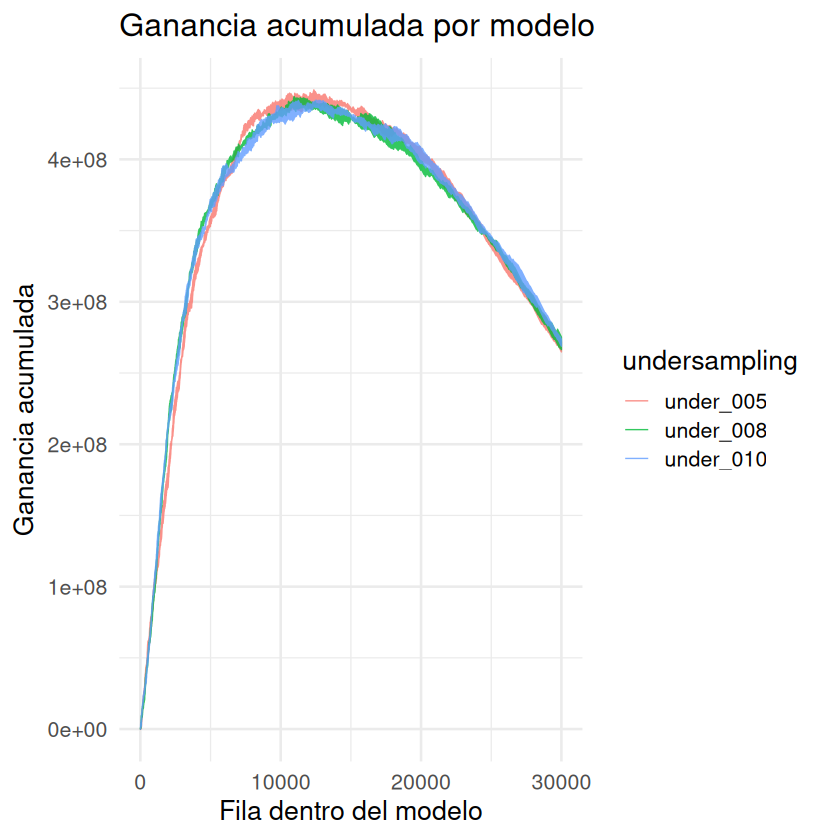

In [56]:
library(ggplot2)

p <- ggplot(final[fila_modelo <= 30000],
            aes(x = fila_modelo, y = gan_acum, color = undersampling)) +
  geom_line(alpha = 0.8, size = 0.4) +   # ← líneas más finas
  theme_minimal(base_size = 16) +        # ← texto más grande
  labs(
    title = "Ganancia acumulada por modelo",
    x = "Fila dentro del modelo",
    y = "Ganancia acumulada"
  )

# Mostrar el gráfico en una ventana grande
p
